In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('C:/Dane/2_ML_Projekty/003_programowanie_ML_zadanka_kurs_wprowadzenie/Moduł 3/Zbiory danych/data_csv.csv')

In [4]:
df.head()

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1871-01-01,4.44,0.26,0.4,12.46,5.32,89.00,5.21,8.02,NaN
1,1871-02-01,4.50,0.26,0.4,12.84,5.32,87.53,5.06,7.78,NaN
2,1871-03-01,4.61,0.26,0.4,13.03,5.33,88.36,4.98,7.67,NaN
3,1871-04-01,4.74,0.26,0.4,12.56,5.33,94.29,5.17,7.96,NaN
4,1871-05-01,4.86,0.26,0.4,12.27,5.33,98.93,5.29,8.14,NaN


In [ ]:
# Sprawdzanie typu danych

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1768 non-null   object 
 1   SP500                 1768 non-null   float64
 2   Dividend              1767 non-null   float64
 3   Earnings              1764 non-null   float64
 4   Consumer Price Index  1768 non-null   float64
 5   Long Interest Rate    1768 non-null   float64
 6   Real Price            1768 non-null   float64
 7   Real Dividend         1767 non-null   float64
 8   Real Earnings         1764 non-null   float64
 9   PE10                  1648 non-null   float64
dtypes: float64(9), object(1)
memory usage: 138.3+ KB


In [ ]:
# data typu obj

In [8]:
df['Date'] =pd.to_datetime(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1768 non-null   datetime64[ns]
 1   SP500                 1768 non-null   float64       
 2   Dividend              1767 non-null   float64       
 3   Earnings              1764 non-null   float64       
 4   Consumer Price Index  1768 non-null   float64       
 5   Long Interest Rate    1768 non-null   float64       
 6   Real Price            1768 non-null   float64       
 7   Real Dividend         1767 non-null   float64       
 8   Real Earnings         1764 non-null   float64       
 9   PE10                  1648 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 138.3 KB


In [ ]:
# Data zmieniła format

In [ ]:
# 1.Wykres liniowy jak wartości SP500 zmienią się w czasie

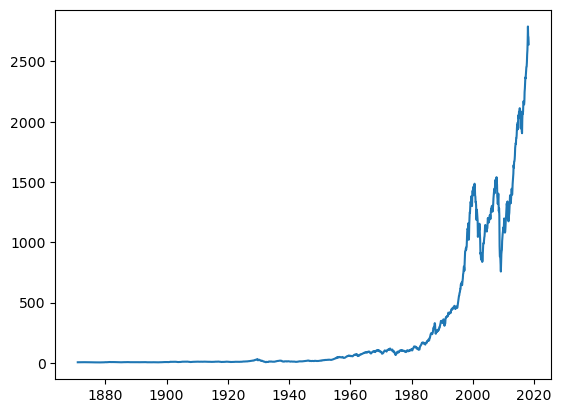

In [10]:
plt.plot(df['Date'], df['SP500'])
plt.show()

In [ ]:
# 2. Wykres słupkowy z danych treningowych biblioteki seaborn

In [21]:
import seaborn as sns

In [22]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# pierwszy argument to co na osi X czyli podgrupy do wyliczenia miary a drugi argument miara odpowiadająca poszczeólnym podgrupom

In [ ]:
# zliczamy liczbę klientów w dniu (day)

In [8]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [ ]:
# teraz wyciągamy etykiety za pomoca metody index

In [9]:
df['day'].value_counts().index

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category', name='day')

In [ ]:
# To będa nasze dwie wartości..Y oraz X

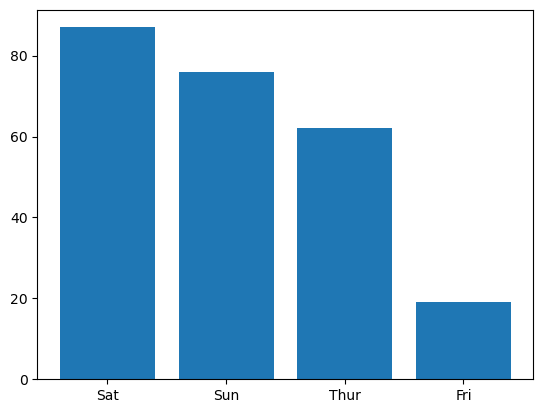

In [19]:
plt.bar(df['day'].value_counts().index, df['day'].value_counts())
plt.show()

In [ ]:
# Sprawdzamy jaki średni napiwek dają mężczyźni a jaki kobiety. grupujemy wyniki ze względu na płeć i wyliczy wartosć napiwku...

In [24]:
df.groupby('sex').agg({'tip':'mean'})

C:\Users\arcis\AppData\Local\Temp\ipykernel_2312\4053845762.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex').agg({'tip':'mean'})


,tip
sex,
Male,3.089618
Female,2.833448


In [25]:
df.groupby('sex', observed=False).agg({'tip': 'mean'})

,tip
sex,
Male,3.089618
Female,2.833448


In [26]:
df_aggr = df.groupby('sex', observed=False).agg({'tip': 'mean'})

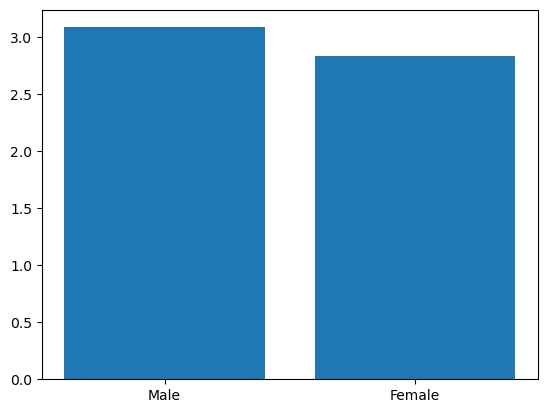

In [28]:
plt.bar(df_aggr.index, df_aggr['tip'])
plt.show()

In [ ]:
# Wykres rozrzutu robimy

In [ ]:
# Czy występuje zaleznosć między cąłkowitą wartością rachunku a zmienna tip czyli napiwkiem

In [29]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


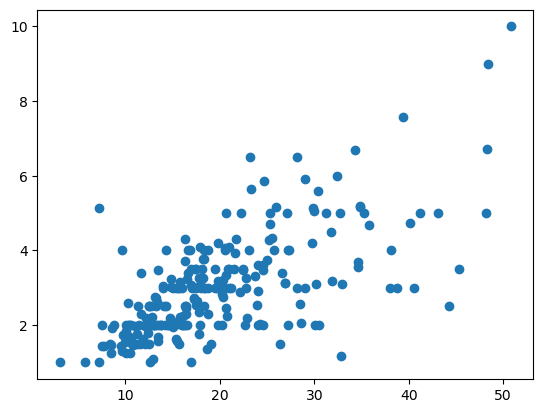

In [30]:
plt.scatter(df['total_bill'], df['tip'])
plt.show()

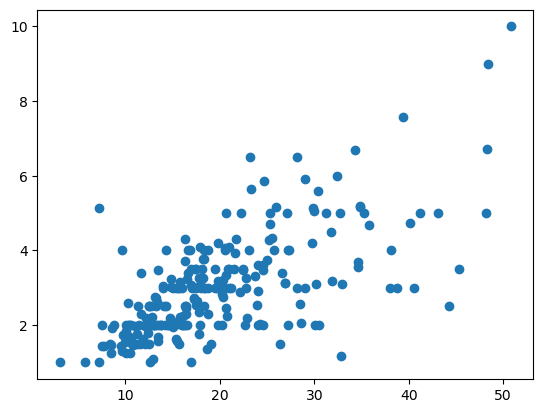

In [32]:
# inny zapis
plt.scatter('total_bill', 'tip', data=df)
plt.show()

In [ ]:
# Wykres kołowy
# jak często klienci odwiedzają retauracje w dane dni

In [33]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# Wykres kołowy jeden argument mówiacy o wartościach można wykorzystac value_counts

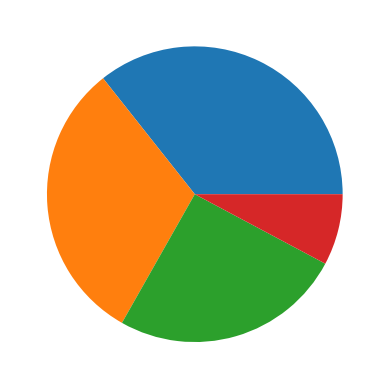

In [34]:
plt.pie(df['day'].value_counts())
plt.show()

In [ ]:
# aby widzieć etykiety trzeba dodać argument labels

In [ ]:
# etykiety ->df['day'].value_counts().index

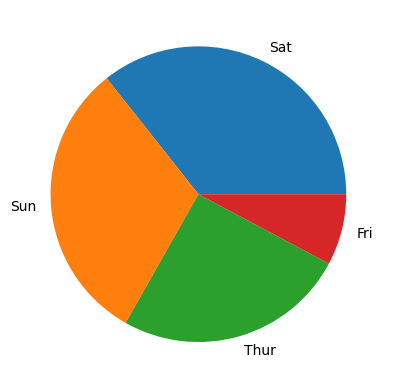

In [35]:
plt.pie(df['day'].value_counts(), labels=df['day'].value_counts().index)
plt.show()

In [ ]:
# dodanie wartości procentowych do wykresu autopct=dwa miejsca po przecinku f=float zmienna precinkowa autopct='%1.2f%%'

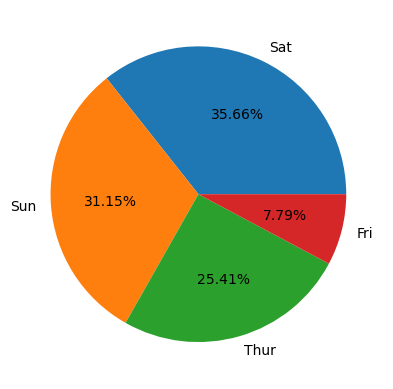

In [39]:
plt.pie(df['day'].value_counts(), labels=df['day'].value_counts().index, autopct='%1.2f%%')
plt.show()

In [ ]:
# Wykres pudełkowy rozkład zmiennej ilościowej..


In [ ]:
# Podajemy argument zmiennej do wizualizacji później pdoajemy nazwę zbioru danych

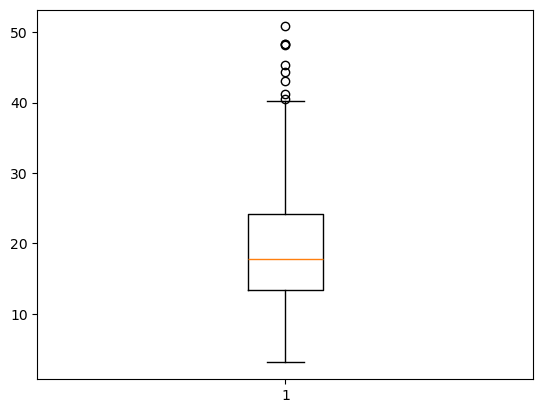

In [40]:
plt.boxplot('total_bill', data=df)
plt.show()

In [ ]:
# kreska oznacza wartośc drugiego kwartyla czyli medianę. Pudełko to rozkład 50% wartości od środka dół pierwszy kwarty a góra trzeci kwartyl

In [ ]:
# Kwartyl – jedna z miar położenia obserwacji.

    # pierwszy kwartyl (notacja: Q1) = dolny kwartyl = kwantyl rzędu 1/4 = 25% obserwacji jest położonych poniżej = 25. procent
    # drugi kwartyl (notacja: Q2) = mediana = kwantyl rzędu 1/2 = dzieli zbiór obserwacji na połowę = 50. procent
    # trzeci kwartyl (notacja: Q3) = górny kwartyl = kwantyl rzędu 3/4 = dzieli zbiór obserwacji na dwie części odpowiednio po 
    # 75% położonych poniżej tego kwartyla i 25% położonych powyżej = 75. procent. 
    # odległość między góra a dołem pudelka to rozstęp ćwiartkowy/między kwartylowy.

In [ ]:
# Górny "wąs" to trzeci kwartyl + 1,5 wartości rozstępu ćwiartkowego
# Dolny "wąś" to pierwszy kwartyl - 1,5 wartości rozstępu ćwiartkowego

In [ ]:
# Punkty powyżej górnego wąsa to wartości odstające powyżej trzeciego kwartyla plus 1.5 wartości rozstępu ćwiartkowego.
# Jak sa punkty poniżej to poniżej pierwszego kwartyla - 1.5 wartości rozstępu ćwiartkowego